In [9]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fast_control.viz.episodic_plot import *
from fast_control.viz.animate import create_animation
from fast_control.viz.plot import *
from fast_control.controller_factory import eval_cs, ControllerFactory, train_episodic_with_info
from fast_control.controller_factory import ControllerFactory
from core.systems import DoubleInvertedPendulum
import sys
import mosek
import numpy as np
import toml
np.set_printoptions(threshold=sys.maxsize)

In [2]:
with open("config.toml") as f:
    config = toml.load(f)
sys_conf = config["acrobat"]
gps_names = sys_conf["gps_names"]
system = DoubleInvertedPendulum(*sys_conf["sys_params"])
system_est = DoubleInvertedPendulum(*sys_conf["sys_est_params"])

In [10]:
control = ControllerFactory(system, system_est)
controllers, gps = train_episodic_with_info(control)

data size:199, rf_d is: 20
ad_rf
training time for ad_rf_gp is: 0.001241461024619639
adp_rf
training time for adp_rf_gp is: 0.004055105964653194
ad_kernel
training time for ad_kernel_gp is: 0.007684806012548506
adp_kernel
training time for adp_kernel_gp is: 0.004701545927673578


  0%|          | 0/10 [00:00<?, ?it/s]

data size:398, rf_d is: 40
ad_rf
training time for ad_rf_gp is: 0.003702318063005805
adp_rf
training time for adp_rf_gp is: 0.002822735928930342
ad_kernel
training time for ad_kernel_gp is: 0.02985620405524969
adp_kernel
training time for adp_kernel_gp is: 0.04754333000164479
iteration 0 training ended


  0%|          | 0/10 [02:57<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
import dill
import pickle
# with open("data/control.pkl", "wb") as handle:
#     pickle.dump(control, handle, protocol=pickle.HIGHEST_PROTOCOL)
serialized_controllers=dill.dumps(controllers)
with open("data/controllers.pkl", "wb") as handle:
    pickle.dump(serialized_controllers, handle, protocol=pickle.HIGHEST_PROTOCOL)
serialized_control=dill.dumps(control)
with open("data/control.pkl", "wb") as handle:
    pickle.dump(serialized_control, handle, protocol=pickle.HIGHEST_PROTOCOL)


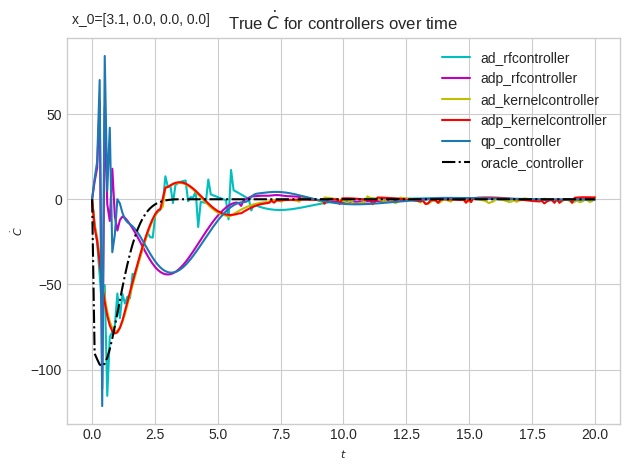

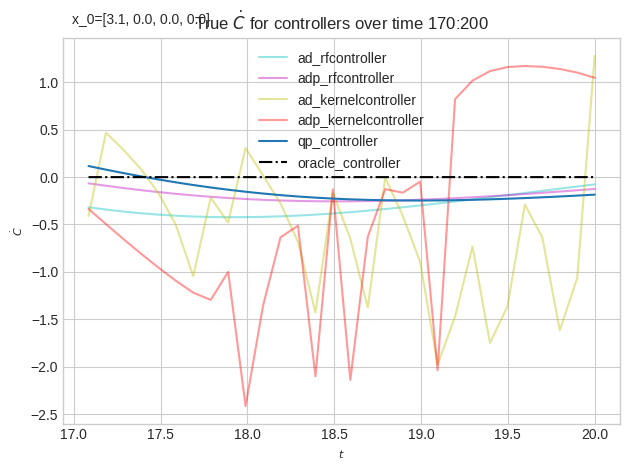

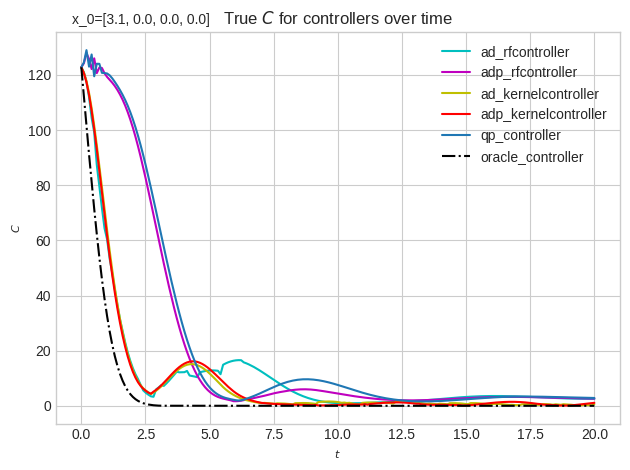

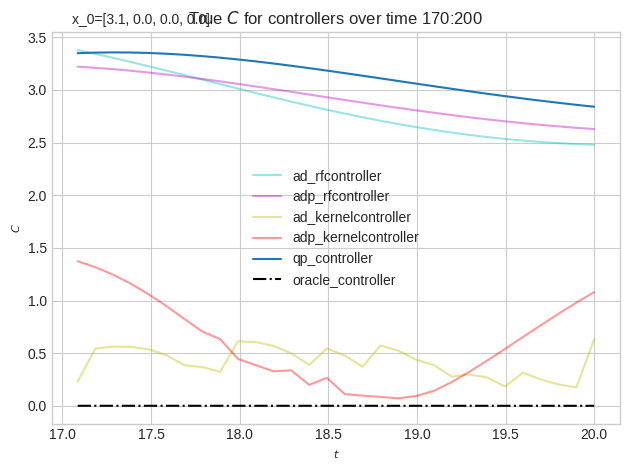

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


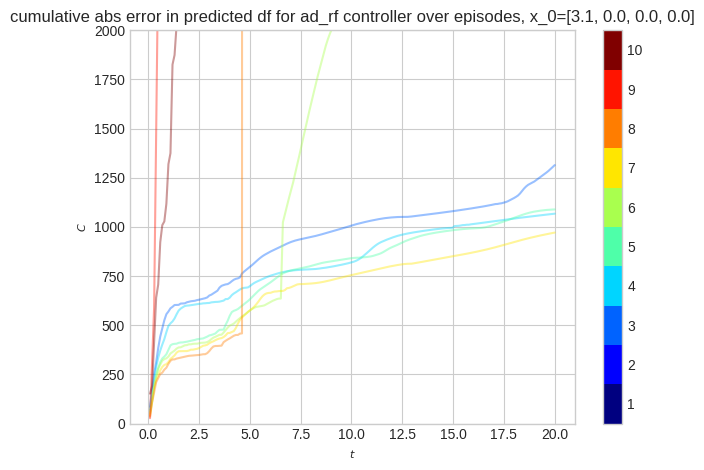

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


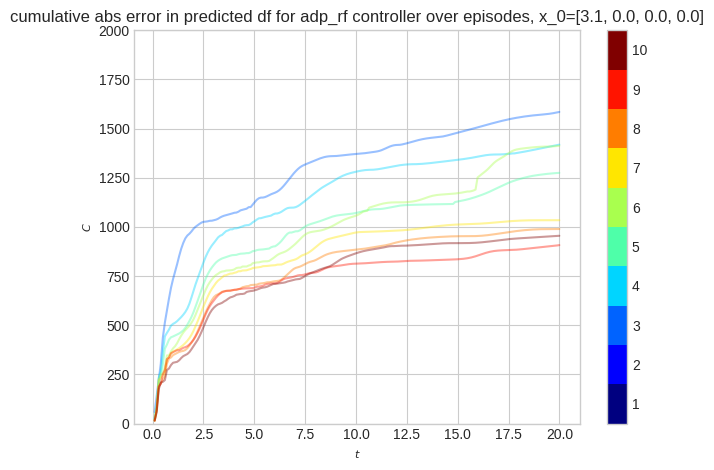

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


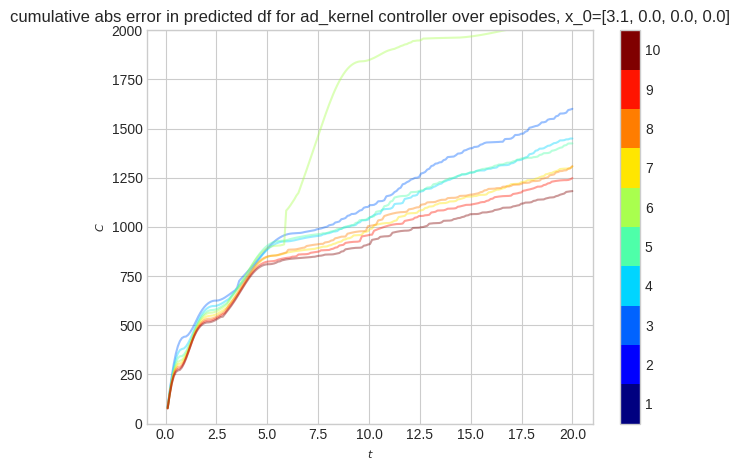

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


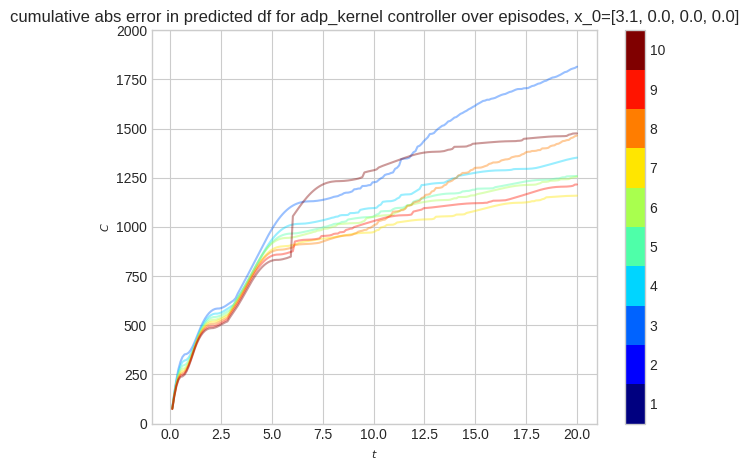

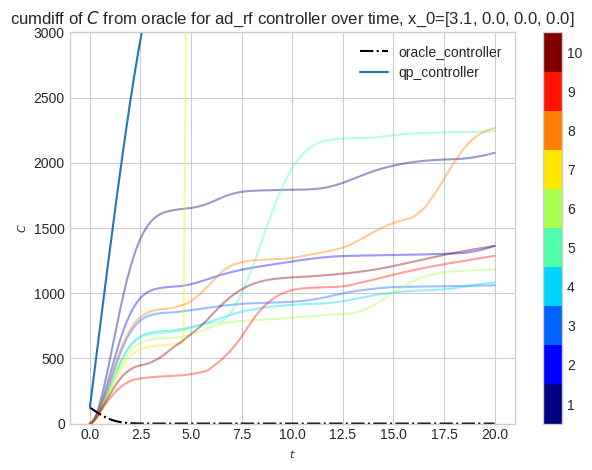

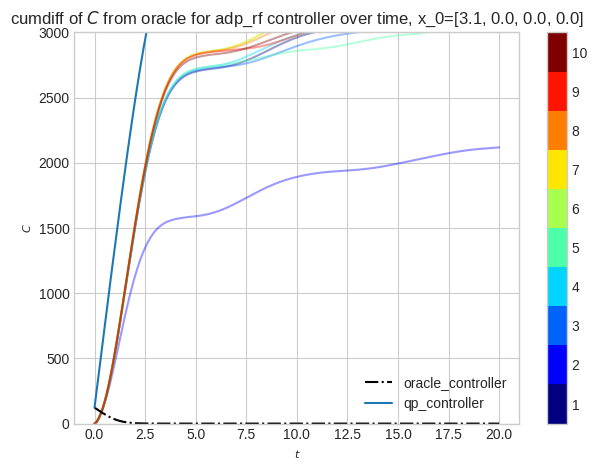

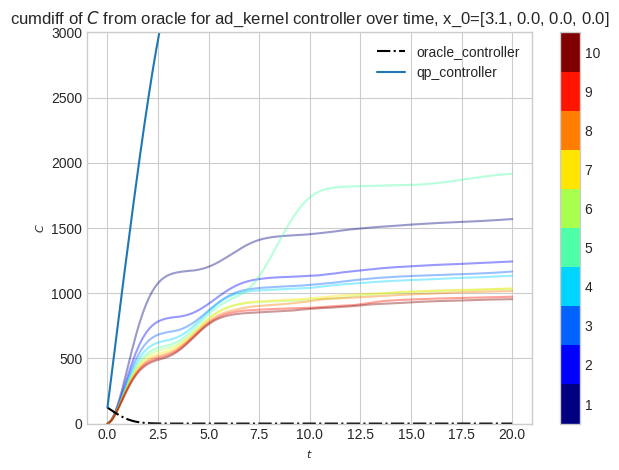

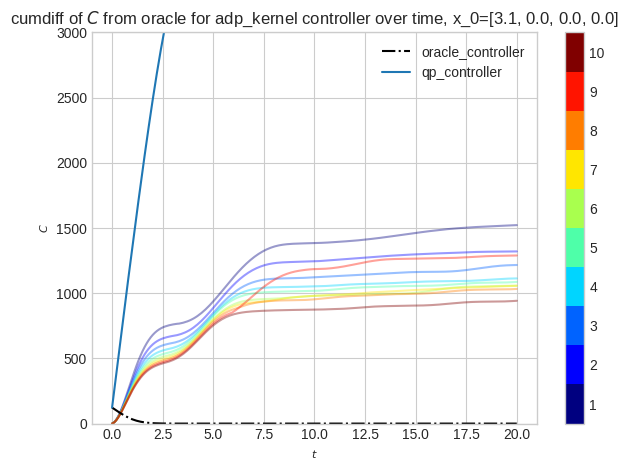

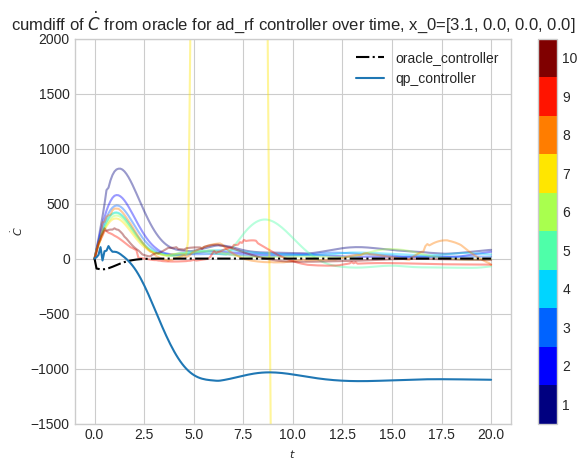

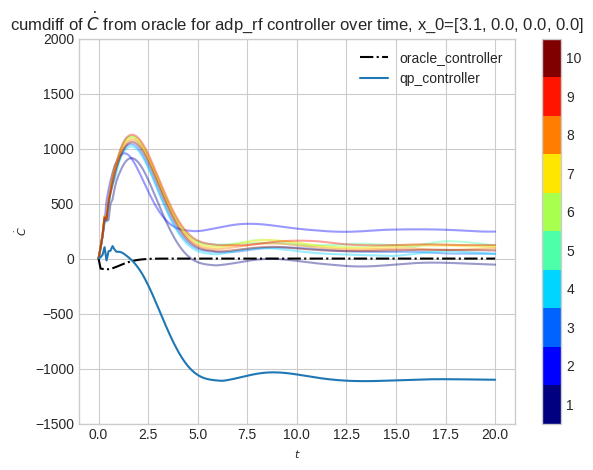

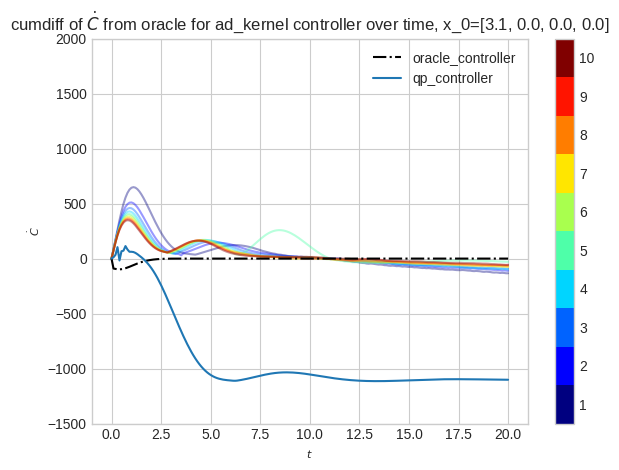

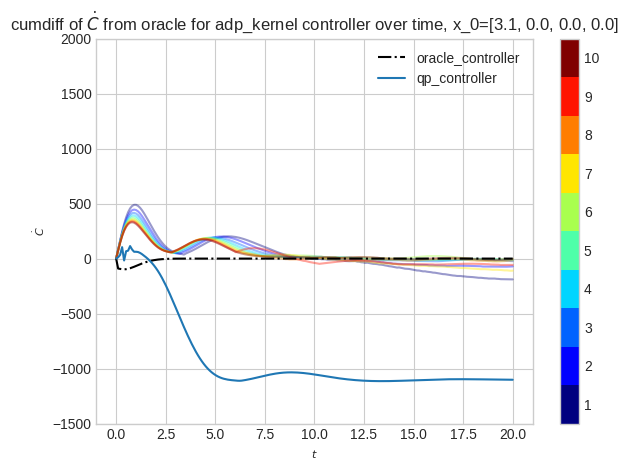

In [10]:
import dill
import pickle
with open("data/controllers.pickle", "rb") as handle:
    serialized_controllers = pickle.load(handle)
with open("data/control.pickle", "rb") as handle:
    serialized_control = pickle.load(handle)

# Deserialize the object using dill
controllers = dill.loads(serialized_controllers)
control = dill.loads(serialized_control)
path = 'data/eval_cs.npz'
plot_info(control.x_0, controllers, path, c_cdot=1)
plot_info(control.x_0, controllers, path, c_cdot=0)
episodic_plot_cum_predicted_vs_true_eval(
    control.x_0, control.epochs, control.T, control.num_steps
)
episodic_plot_cum_diff_from_oracle_for_controller(
    control.x_0, control.epochs, path, gps_names, c_cdot=0
)
episodic_plot_cum_diff_from_oracle_for_controller(
    control.x_0, control.epochs, path, gps_names, c_cdot=1
)
# episodic_plot_predicted_vs_true_eval(control.x_0, control.epochs, control.T, control.num_steps)
# plot_info(control.x_0, controllers, path, c_cdot=1)
# plot_info(control.x_0, controllers, 'data/diff_from_oracle.npz', diff=True, c_cdot=1)
# # plot_predicted_vs_true_func(x_0, epochs, T)
# episodic_plot_cum_predicted_vs_true_eval(control.x_0, control.epochs, control.T, control.num_steps)
# plot_qp(control, 0)

In [6]:
controllers, gps = control.train_grid()
control.grid_info(controllers, eval_c)

AttributeError: 'ControllerFactory' object has no attribute 'train_grid'

In [ ]:
#create_data(1, 10)
# data = np.load('data,pi,1,sim:10,100.npz')
data = np.load('data_1_10.npz')
xs = data['xs']
ys = data['ys']
zs = data['zs']
print(xs.shape)

In [ ]:
# from multiprocessing import Pool
# with Pool(3) as p:
#     ans = p.starmap(make_c_data, enumerate(initial_x0s))
#     ans2 = p.starmap(make_c_dot_data, enumerate(initial_x0s))

In [ ]:
for num,x_0 in tqdm(enumerate(initial_x0s)): 
    if os.path.isfile(f'/home/kk983/random_features/data/c_dots/{num}.npz'):
        plot_c_dot(num,x_0)

In [ ]:
# slacks = ['linear', 'quadratic']
# sgms = [5,10,15,20,25,30]
# for sgm in sgms:
#     for slack in slacks:
#         controllers, gps = train_episodic(system, system_est, x_0, epochs, T, num_steps, info=True, func=eval_c, sgm=sgm, slack=slack)
#         data = np.load('data/_diff from oracle.npz')
#         print(f'sgm={sgm}, slack={slack},diff={data["gp_zs"].T[-1]}')

In [ ]:
# create_grid_data(system, qp_controller, lyap, lyap_est, T, num_steps)
# episodic_plot_func_for_controller(x_0, 10, path, gp_names)

In [ ]:
create_animation(system, controllers, gps, x_0)

1it [01:21, 81.84s/it]

In [ ]:
plot_qp(eval_c)
for gp,controller in zip(gps, controllers):
    plot_simulation_dip(system, controller, x_0, T, num_steps)
    plot_closed_loop_errorbar(
    system, system_est, controller, gp, x_0, T, num_steps, cut_off=20)



In [ ]:
path = 'data/eval_c.npz'
episodic_plot_predicted_vs_true_func(x_0, epochs, T, num_steps)
plot_info(x_0, controllers, path)
plot_info(x_0, controllers, 'data/diff_from_oracle.npz', diff=True)
# plot_predicted_vs_true_func(x_0, epochs, T)
episodic_plot_cum_predicted_vs_true_func(x_0, epochs, T, num_steps)

In [ ]:
slacks = ["constant", "linear", "quadratic"]
    sgms = [5, 10, 15, 20, 25, 30]

    for sgm in sgms:
        for slack in slacks:
            controllers, gps = control.train_episodic(info=True)
            data = np.load("data/_diff from oracle.npz")
            print(f'sgm={sgm}, slack={slack},diff={data["gp_zs"].T[-1]}')
            with open("data/test_previous_gp.pickle", "rb") as handle:
                data = pickle.load(handle)
            data[gp][-1]
            # save plots with time stamps, sigma and slack
            # run some sort of optimization, sum diff from oracle, maybe do a heat map?
